In [1044]:
import numpy as np
import pandas as pd
import math 
import matplotlib.pyplot as plt
import datetime
from matplotlib import pyplot

In [1245]:
df_train = pd.read_csv('train.csv/train.csv',nrows=500000)

In [1246]:
df_train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [1247]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 8 columns):
key                  500000 non-null object
fare_amount          500000 non-null float64
pickup_datetime      500000 non-null object
pickup_longitude     500000 non-null float64
pickup_latitude      500000 non-null float64
dropoff_longitude    499995 non-null float64
dropoff_latitude     499995 non-null float64
passenger_count      500000 non-null int64
dtypes: float64(5), int64(1), object(2)
memory usage: 30.5+ MB


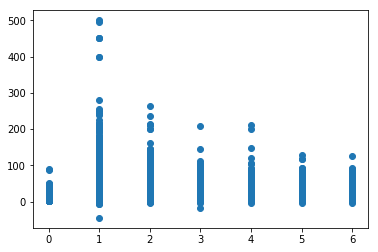

In [1248]:
plt.scatter(df_train.passenger_count,df_train.fare_amount)

In [1249]:
df_train['distance'] = np.sqrt((df_train['pickup_longitude']-df_train['dropoff_longitude'])**2 + (df_train['pickup_latitude']-df_train['dropoff_latitude'])**2)

In [1250]:
df_train = df_train[df_train['passenger_count']>=1]

In [1254]:
df_train=df_train[df_train['pickup_longitude']>=-100]
df_train = df_train[df_train['pickup_latitude']<=200]
df_train=df_train[df_train['dropoff_longitude']<=10]
df_train = df_train[df_train['dropoff_latitude']<=50]

In [1255]:
df_train=df_train[df_train['pickup_longitude']<=-20]
df_train = df_train[df_train['pickup_latitude']<=45]
df_train = df_train[df_train['pickup_latitude']>=10]
df_train=df_train[df_train['dropoff_longitude']<=-30]
df_train=df_train[df_train['dropoff_longitude']>=-500]
df_train = df_train[df_train['dropoff_latitude']>=35]

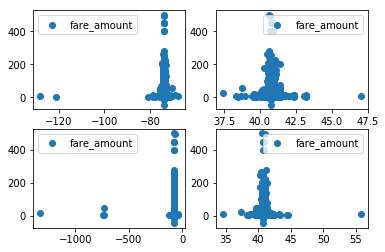

In [1253]:
pyplot.subplot(2,2,1)
plt.scatter(df_train['pickup_longitude'],df_train['fare_amount'])
pyplot.legend()

pyplot.subplot(2,2,2)
plt.scatter(df_train['pickup_latitude'],df_train['fare_amount'])
pyplot.legend()

pyplot.subplot(2,2,3)
plt.scatter(df_train['dropoff_longitude'],df_train['fare_amount'])
pyplot.legend()

pyplot.subplot(2,2,4)
plt.scatter(df_train['dropoff_latitude'],df_train['fare_amount'])
pyplot.legend()

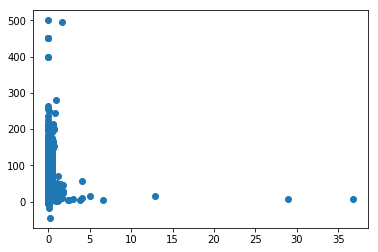

In [1256]:
plt.scatter(df_train['distance'],df_train['fare_amount'])

In [1261]:
df_train = df_train[df_train['distance'] <= 0.5]

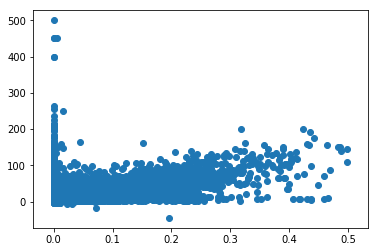

In [1262]:
plt.scatter(df_train['distance'],df_train['fare_amount'])

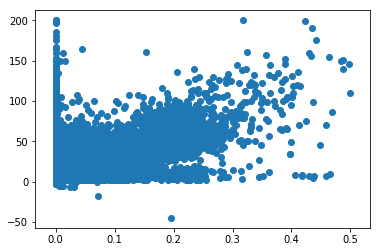

In [1263]:
df_train = df_train[df_train['fare_amount'] <= 200]
plt.scatter(df_train['distance'],df_train['fare_amount'])

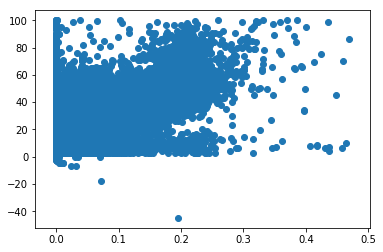

In [1264]:
df_train = df_train[df_train['fare_amount'] <= 100]
plt.scatter(df_train['distance'],df_train['fare_amount'])

In [1265]:
df_train = df_train[df_train['distance']>0]
df_train = df_train[df_train['fare_amount']>0]

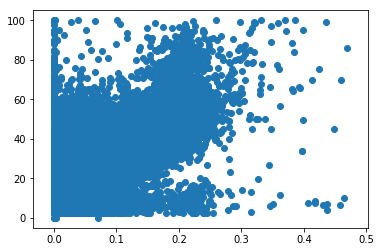

In [1266]:
plt.scatter(df_train['distance'],df_train['fare_amount'])

In [1267]:
date_list = df_train['pickup_datetime']
year_list = []
month_list = []
time_list = []

for item in date_list:
    year_list.append(item[0:4])
    month_list.append(item[5:7])
    time_list.append(item[11:13])
    
for i in range(len(month_list)):
    if 4 <= int(month_list[i]) <= 6:
        month_list[i] = '1'
    elif 7<= int(month_list[i]) <= 9:
        month_list[i] = '2'
    elif 10 <= int(month_list[i]) <= 12:
        month_list[i] = '3'
    else:
        month_list[i] = '4'
    
for i in range(len(time_list)):
    if 4 <= int(time_list[i]) <= 7 :
        time_list[i] = 'M'
    elif 8 <= int(time_list[i]) <= 13:
        time_list[i] = 'L'
    elif 14 <= int(time_list[i]) <= 16:
        time_list[i] = 'A'
    elif 78 <= int(time_list[i]) <= 20:
        time_list[i] = 'S'
    else:
        time_list[i] = 'N'

    


In [1268]:
df_train['year'] = year_list
df_train['month'] = month_list
df_train['time'] = time_list

In [1269]:
df_train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,year,month,time
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.009436,2009,1,N
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.079696,2010,4,A
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.013674,2011,2,N
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.025340,2012,1,M
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.019470,2010,4,M


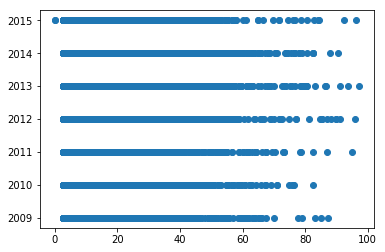

In [1084]:
plt.scatter(df_train.fare_amount,df_train.year)

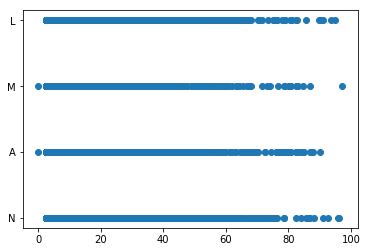

In [1085]:
plt.scatter(df_train.fare_amount,df_train.time)

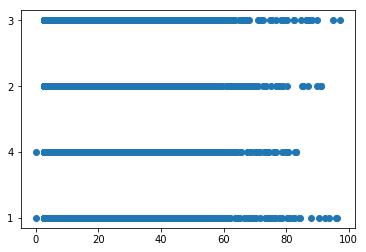

In [1086]:
plt.scatter(df_train.fare_amount,df_train.month)

In [1270]:
df_train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,year,month,time
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.009436,2009,1,N
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.079696,2010,4,A
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.013674,2011,2,N
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.025340,2012,1,M
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.019470,2010,4,M


In [1271]:
df = df_train.loc[:,['fare_amount','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','distance','year','month','time']]

### ダミー変数化を行う

#### yearごとに分ける

In [1272]:
df=pd.get_dummies(df,columns=['year','time','month'])

In [1273]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,year_2009,year_2010,year_2011,...,year_2014,year_2015,time_A,time_L,time_M,time_N,month_1,month_2,month_3,month_4
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,0.009436,1,0,0,...,0,0,0,0,0,1,1,0,0,0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,0.079696,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0.013674,0,0,1,...,0,0,0,0,0,1,0,1,0,0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,0.025340,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,0.019470,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [1274]:
X = df.drop('fare_amount',axis=1)
y = df['fare_amount']

In [1275]:
X.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,year_2009,year_2010,year_2011,year_2012,...,year_2014,year_2015,time_A,time_L,time_M,time_N,month_1,month_2,month_3,month_4
0,-73.844311,40.721319,-73.841610,40.712278,1,0.009436,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,-74.016048,40.711303,-73.979268,40.782004,1,0.079696,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,-73.982738,40.761270,-73.991242,40.750562,2,0.013674,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
3,-73.987130,40.733143,-73.991567,40.758092,1,0.025340,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
4,-73.968095,40.768008,-73.956655,40.783762,1,0.019470,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [1276]:
y.head()

0     4.5
1    16.9
2     5.7
3     7.7
4     5.3
Name: fare_amount, dtype: float64

###  モデル構築

In [1277]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import Ridge
ridge = Ridge()
lr = LinearRegression()
rg = RFR(n_jobs=-1, random_state=2525)

In [1278]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7)

C:\Users\k31m0\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [1279]:
# モデルの学習。fit関数で行う。
lr.fit(X_train, y_train)
rg.fit(X_train,y_train)
ridge.fit(X_train,y_train)

print(lr.score(X_test,y_test))
print(lr.score(X_train,y_train))

print(rg.score(X_test,y_test))
print(rg.score(X_train,y_train))

print(ridge.score(X_test,y_test))
print(ridge.score(X_train,y_train))

C:\Users\k31m0\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8120185906216683
0.809039513338582
0.8543519377997062
0.9733294180283454
0.8119971594987971
0.8090351144728006


In [1201]:
#drop_row = ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']
drop_row = ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','year_2009','year_2010','year_2011','year_2012','year_2013','year_2014','year_2015']
#drop_row = ['month_1','month_2','month_3','month_4','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','year_2009','year_2010','year_2011','year_2012','year_2013','year_2014','year_2015',]

df_arrange = df.drop(drop_row,axis=1)


X = df_arrange.drop('fare_amount',axis=1)
y = df['fare_amount']

In [1202]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.5)
# モデルの学習。fit関数で行う。
lr.fit(X_train, y_train)
rg.fit(X_train,y_train)

print(lr.score(X_test,y_test))
print(lr.score(X_train,y_train))

print(rg.score(X_test,y_test))
print(rg.score(X_train,y_train))

C:\Users\k31m0\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


0.7998262277867858
0.8017221902646877
0.763107814043574
0.9591875648582019


In [1280]:
X.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,year_2009,year_2010,year_2011,year_2012,...,year_2014,year_2015,time_A,time_L,time_M,time_N,month_1,month_2,month_3,month_4
0,-73.844311,40.721319,-73.841610,40.712278,1,0.009436,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,-74.016048,40.711303,-73.979268,40.782004,1,0.079696,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,-73.982738,40.761270,-73.991242,40.750562,2,0.013674,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
3,-73.987130,40.733143,-73.991567,40.758092,1,0.025340,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
4,-73.968095,40.768008,-73.956655,40.783762,1,0.019470,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


### 予測用データのインポート

In [1281]:
df_test = pd.read_csv('test.csv')

In [1282]:
df_test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [1283]:
df_test['distance'] = np.sqrt((df_test['pickup_longitude']-df_test['dropoff_longitude'])**2 + (df_test['pickup_latitude']-df_test['dropoff_latitude'])**2)

In [1284]:
date_list = df_test['pickup_datetime']
year_list = []
month_list = []
time_list = []

for item in date_list:
    year_list.append(item[0:4])
    month_list.append(item[5:7])
    time_list.append(item[11:13])
    
for i in range(len(month_list)):
    if 4 <= int(month_list[i]) <= 6:
        month_list[i] = '1'
    elif 7<= int(month_list[i]) <= 9:
        month_list[i] = '2'
    elif 10 <= int(month_list[i]) <= 12:
        month_list[i] = '3'
    else:
        month_list[i] = '4'
    
for i in range(len(time_list)):
    if 4 <= int(time_list[i]) <= 7 :
        time_list[i] = 'M'
    elif 8 <= int(time_list[i]) <= 13:
        time_list[i] = 'L'
    elif 14 <= int(time_list[i]) <= 16:
        time_list[i] = 'A'
    elif 78 <= int(time_list[i]) <= 20:
        time_list[i] = 'S'
    else:
        time_list[i] = 'N'

In [1285]:
df_test['year'] = year_list
df_test['month'] = month_list
df_test['time'] = time_list

In [1286]:
df_test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,year,month,time
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1,0.021554,2015,4,L
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1,0.023180,2015,4,L
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1,0.005870,2011,3,L
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1,0.018649,2012,3,N
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1,0.050631,2012,3,N


In [1287]:
df = df_test.loc[:,['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','distance','year','month','time']]
df=pd.get_dummies(df,columns=['year','time','month'])

In [1168]:
#drop_row = ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']
drop_row = ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','year_2009','year_2010','year_2011','year_2012','year_2013','year_2014','year_2015']
#drop_row = ['month_1','month_2','month_3','month_4','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','year_2009','year_2010','year_2011','year_2012','year_2013','year_2014','year_2015',]

#df_arrange = df.drop(drop_row,axis=1)
df_arrage = df

In [1288]:
#df_pre = df_arrange
df_pre = df
X_pre = df_pre

In [1289]:
y_pred = rg.predict(X_pre)

In [1290]:
df_test['fare_amount'] = y_pred
test_result = df_test.loc[:,['key','fare_amount']]

In [1291]:
test_result.head()

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.50
1,2015-01-27 13:08:24.0000003,10.95
2,2011-10-08 11:53:44.0000002,4.86
3,2012-12-01 21:12:12.0000002,10.56
4,2012-12-01 21:12:12.0000003,15.99


In [1292]:
test_result.to_csv('result_500000.csv',index=False)